### __Import Libraries__

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

### __Load Dataset__

In [2]:
bank = pd.read_csv('bank-additional-full.csv', sep = ';')
bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

### __Data Visualization : Bank Clients__

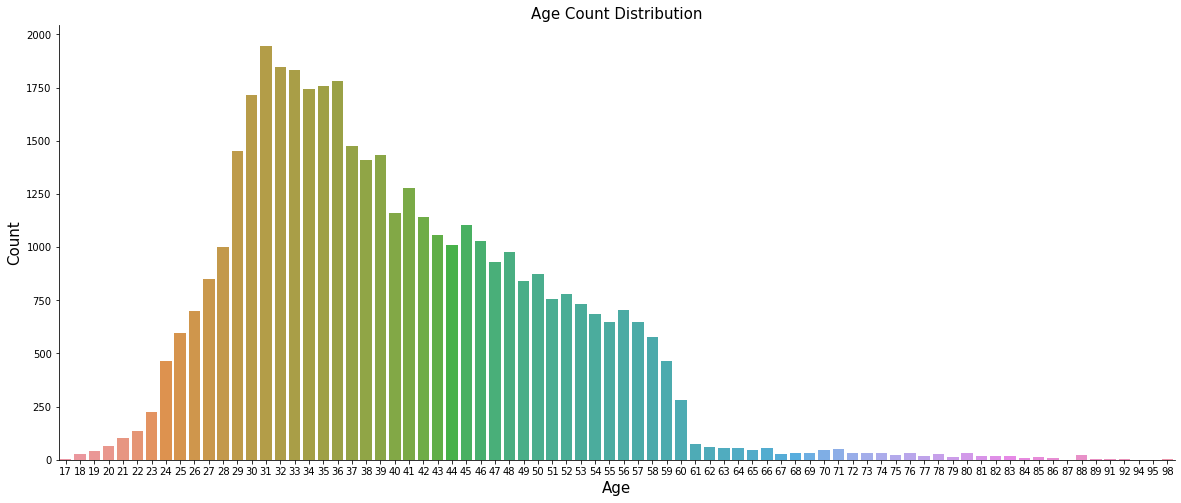

In [5]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = bank)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

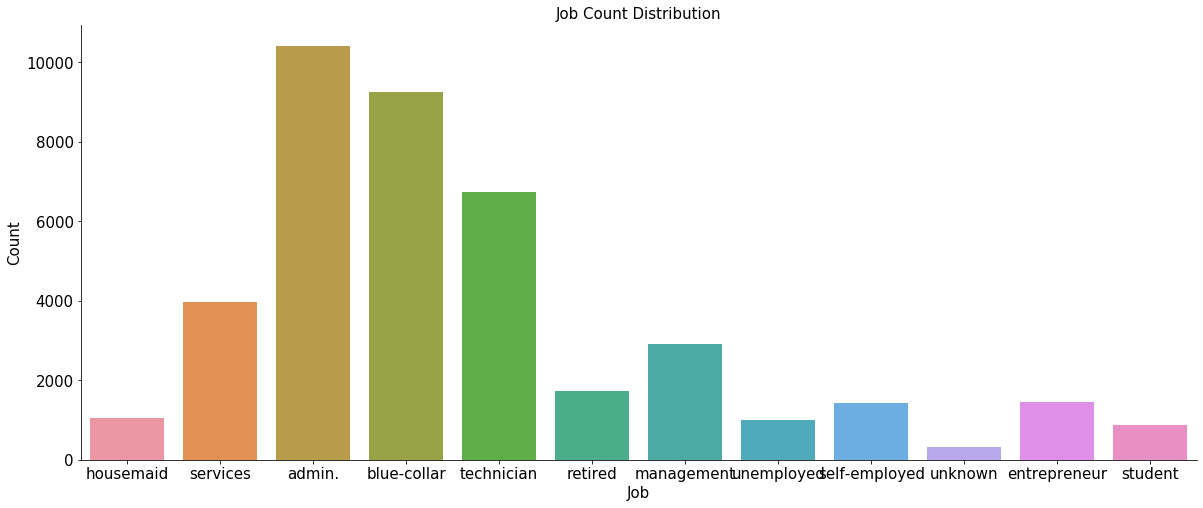

In [23]:
# What kind of jobs clients this bank have, if you cross jobs with default, loan or housing, there is no relation
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', data = bank)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Job Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

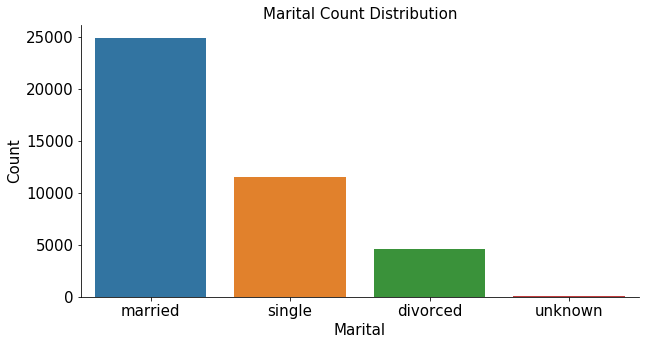

In [24]:
# What kind of 'marital clients' this bank have, if you cross marital with default, loan or housing, there is no relation
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'marital', data = bank)
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Marital Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

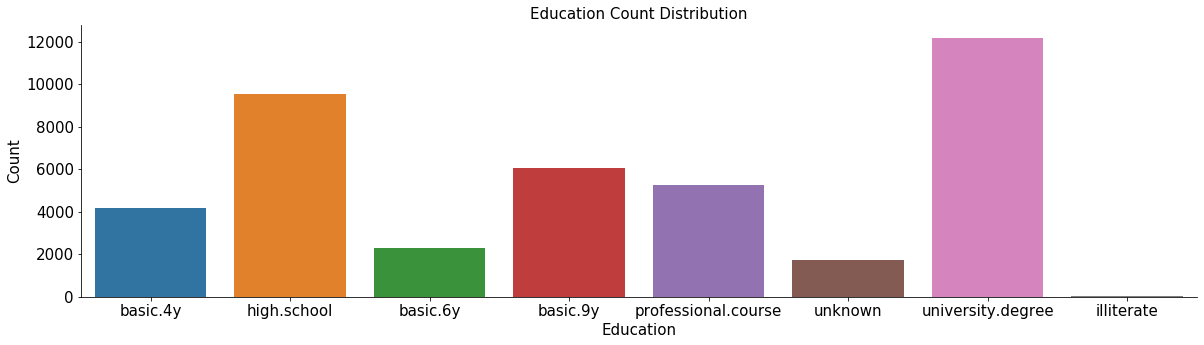

In [25]:
# What kind of 'education clients this bank have, if you cross education with default, loan or housing, there is no relation
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'education', data = bank)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

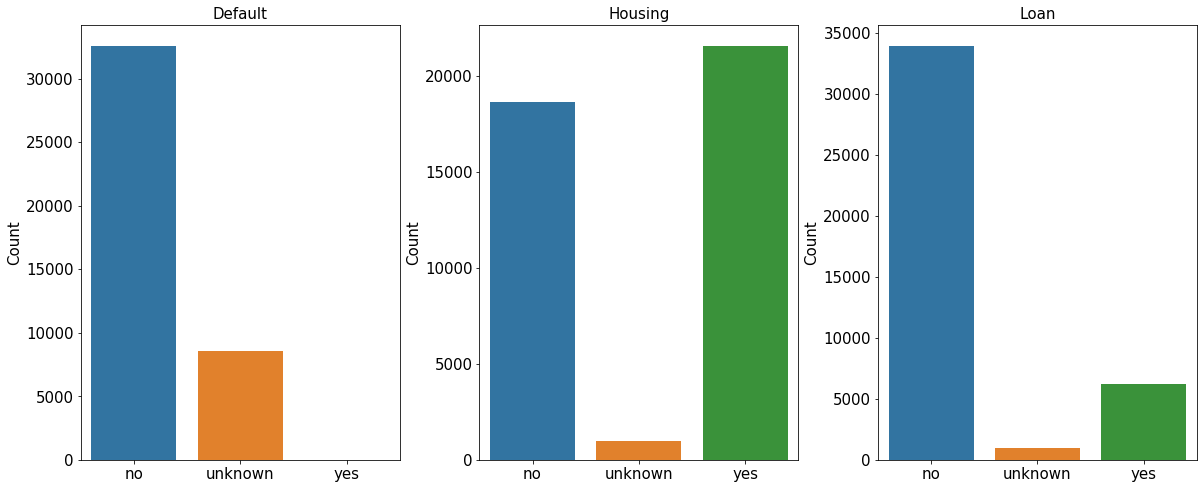

In [26]:
# Default, has credit in default ?
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'default', data = bank, ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

# Housing, has housing loan ?
sns.countplot(x = 'housing', data = bank, ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

# Loan, has personal loan ?
sns.countplot(x = 'loan', data = bank, ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

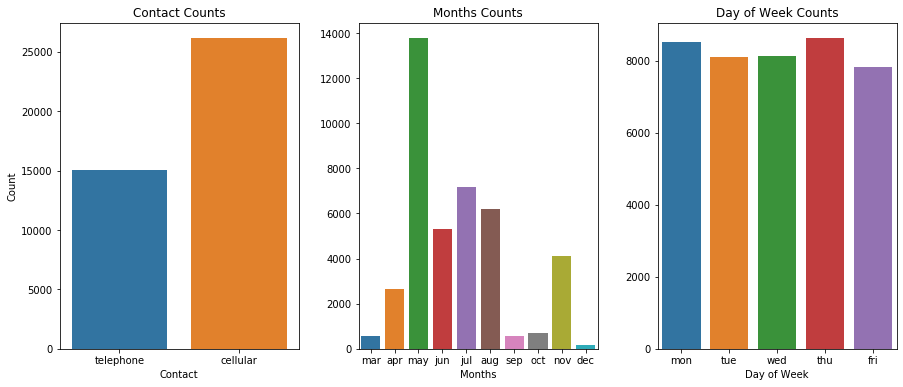

In [79]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,6))
sns.countplot(bank['contact'], ax = ax1)
ax1.set_xlabel('Contact', fontsize = 10)
ax1.set_ylabel('Count', fontsize = 10)
ax1.set_title('Contact Counts')
ax1.tick_params(labelsize=10)

sns.countplot(bank['month'], ax = ax2, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax2.set_xlabel('Months', fontsize = 10)
ax2.set_ylabel('')
ax2.set_title('Months Counts')
ax2.tick_params(labelsize=10)

sns.countplot(bank['day_of_week'], ax = ax3)
ax3.set_xlabel('Day of Week', fontsize = 10)
ax3.set_ylabel('')
ax3.set_title('Day of Week Counts')
ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.25)

### __Encoding__

In [6]:
bank1 = bank.copy()

In [7]:
# Label encoder order is alphabetical
labelencoder_X = LabelEncoder()
bank1['job']      = labelencoder_X.fit_transform(bank1['job']) 
bank1['marital']  = labelencoder_X.fit_transform(bank1['marital']) 
bank1['education']= labelencoder_X.fit_transform(bank1['education']) 
bank1['default']  = labelencoder_X.fit_transform(bank1['default']) 
bank1['housing']  = labelencoder_X.fit_transform(bank1['housing']) 
bank1['loan']     = labelencoder_X.fit_transform(bank1['loan']) 
bank1['contact']  = labelencoder_X.fit_transform(bank1['contact']) 
bank1['month']    = labelencoder_X.fit_transform(bank1['month']) 
bank1['day_of_week'] = labelencoder_X.fit_transform(bank1['day_of_week']) 

In [8]:
print("Max Age  :  ", bank['age'].max())
print("Min Age  :   ", bank['age'].min())
print("Mean Age :   ", bank['age'].mean())
print("STD Age  :   ", bank['age'].std())
# Std close to the mean means that the data values are close to the mean 

Max Age  :   98
Min Age  :    17
Mean Age :    40.02406040594348
STD Age  :    10.421249980934235


In [9]:
#finding outlier

def find_outlier(yourList):
    q1 = yourList.describe()['25%']
    q2 = yourList.describe()['50%']
    q3 = yourList.describe()['75%']
    iqr = q3 - q1
    batas_bawah = q1 - 1.5 * iqr
    batas_atas = q3 + 1.5 * iqr
    outlier = []
    for i in yourList:
        if i < batas_bawah or i > batas_atas:
            outlier.append(i)
    return outlier

In [10]:
print("Jumlah Outlier =", len(find_outlier(bank['age'])))

Jumlah Outlier = 469


In [11]:
# Quartiles
print('1º Quartile: ', bank['age'].quantile(q = 0.25))
print('2º Quartile: ', bank['age'].quantile(q = 0.50))
print('3º Quartile: ', bank['age'].quantile(q = 0.75))
print('4º Quartile: ', bank['age'].quantile(q = 1.00))

1º Quartile:  32.0
2º Quartile:  38.0
3º Quartile:  47.0
4º Quartile:  98.0


In [12]:
#function to creat group of ages, this helps because we have 78 differente values here
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
    return dataframe

age(bank1);

In [13]:
bank1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,3,1,0,0,0,0,1,6,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,3,7,1,3,1,0,0,1,6,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,7,1,3,0,2,0,1,6,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,2,0,1,1,0,0,0,1,6,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,3,7,1,3,0,0,2,1,6,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [14]:
print("Max duration  call in minutes:  ", round((bank['duration'].max()/60),1))
print("Min duration  call in minutes:   ", round((bank['duration'].min()/60),1))
print("Mean duration call in minutes:   ", round((bank['duration'].mean()/60),1))
print("STD duration  call in minutes:   ", round((bank['duration'].std()/60),1))
# Std close to the mean means that the data values are close to the mean 

Max duration  call in minutes:   82.0
Min duration  call in minutes:    0.0
Mean duration call in minutes:    4.3
STD duration  call in minutes:    4.3


In [15]:
print("Jumlah Outlier =", len(find_outlier(bank['duration'])))

Jumlah Outlier = 2963


In [16]:
# Quartiles
print('1º Quartile: ', bank['duration'].quantile(q = 0.25))
print('2º Quartile: ', bank['duration'].quantile(q = 0.50))
print('3º Quartile: ', bank['duration'].quantile(q = 0.75))
print('4º Quartile: ', bank['duration'].quantile(q = 1.00))

1º Quartile:  102.0
2º Quartile:  180.0
3º Quartile:  319.0
4º Quartile:  4918.0


In [17]:
def duration(data):

    data.loc[data['duration'] <= 102, 'duration'] = 1
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180)  , 'duration']    = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration']   = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 644.5), 'duration'] = 4
    data.loc[data['duration']  > 644.5, 'duration'] = 5

    return data
duration(bank1);

In [18]:
bank1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,3,1,0,0,0,0,1,6,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,3,7,1,3,1,0,0,1,6,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,7,1,3,0,2,0,1,6,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,2,0,1,1,0,0,0,1,6,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,3,7,1,3,0,0,2,1,6,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [19]:
bank['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [20]:
bank1['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)

In [21]:
bank1['y'].replace(['no','yes'], [0,1], inplace  = True)

In [22]:
bank1.shape

(41188, 21)

In [23]:
bank1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,3,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,2,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,2,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,3,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,4,5,1,5,0,2,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,2,1,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,3,5,1,6,0,2,0,0,7,0,...,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,2,9,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


### __Scaling__

In [24]:
kolom = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']

In [25]:
for i in kolom:
    bank1[i] = RobustScaler().fit_transform(bank1[[i]])

In [26]:
bank1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.0,0.142857,0.0,-0.75,0.0,-1.0,0.0,1.0,0.666667,-0.5,...,-0.5,0.0,0.0,0.0,0.0000,0.266594,0.857143,0.000000,0.000000,0
1,1.0,0.714286,0.0,0.00,1.0,-1.0,0.0,1.0,0.666667,-0.5,...,-0.5,0.0,0.0,0.0,0.0000,0.266594,0.857143,0.000000,0.000000,0
2,0.0,0.714286,0.0,0.00,0.0,0.0,0.0,1.0,0.666667,-0.5,...,-0.5,0.0,0.0,0.0,0.0000,0.266594,0.857143,0.000000,0.000000,0
3,0.0,-0.285714,0.0,-0.50,0.0,-1.0,0.0,1.0,0.666667,-0.5,...,-0.5,0.0,0.0,0.0,0.0000,0.266594,0.857143,0.000000,0.000000,0
4,1.0,0.714286,0.0,0.00,0.0,-1.0,2.0,1.0,0.666667,-0.5,...,-0.5,0.0,0.0,0.0,0.0000,0.266594,0.857143,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,2.0,0.428571,0.0,0.50,0.0,0.0,0.0,0.0,1.000000,-1.0,...,-0.5,0.0,0.0,0.0,-0.6875,1.107726,-1.428571,-1.058612,-1.762791,1
41184,0.0,-0.142857,0.0,0.50,0.0,-1.0,0.0,0.0,1.000000,-1.0,...,-0.5,0.0,0.0,0.0,-0.6875,1.107726,-1.428571,-1.058612,-1.762791,0
41185,1.0,0.428571,0.0,0.75,0.0,0.0,0.0,0.0,1.000000,-1.0,...,0.0,0.0,0.0,0.0,-0.6875,1.107726,-1.428571,-1.058612,-1.762791,0
41186,0.0,1.000000,0.0,0.50,0.0,-1.0,0.0,0.0,1.000000,-1.0,...,-0.5,0.0,0.0,0.0,-0.6875,1.107726,-1.428571,-1.058612,-1.762791,1


### **Features Selection**

In [27]:
from sklearn.ensemble import ExtraTreesClassifier

In [28]:
x = bank1.drop(['y'], axis=1)
y = bank1['y']

In [29]:
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.04594789 0.07321586 0.04076076 0.06671095 0.01286035 0.03252738
 0.02289257 0.01353174 0.01637554 0.06086165 0.2052996  0.07518385
 0.05336499 0.0142766  0.02831079 0.02591451 0.02167601 0.02269298
 0.11761309 0.04998289]


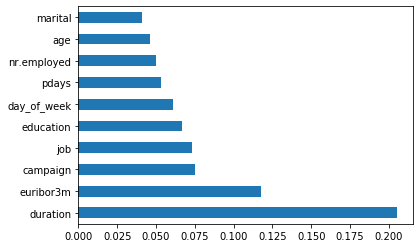

In [30]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()
# feat_importances

In [31]:
bank2 = bank1[['duration','euribor3m','age','campaign','job','education','day_of_week','pdays','nr.employed','marital','y']]

In [32]:
bank2

,duration,euribor3m,age,campaign,job,education,day_of_week,pdays,nr.employed,marital,y
0,0.5,0.000000,1.0,-0.5,0.142857,-0.75,-0.5,0.0,0.000000,0.0,0
1,0.0,0.000000,1.0,-0.5,0.714286,0.00,-0.5,0.0,0.000000,0.0,0
2,0.5,0.000000,0.0,-0.5,0.714286,0.00,-0.5,0.0,0.000000,0.0,0
3,0.0,0.000000,0.0,-0.5,-0.285714,-0.50,-0.5,0.0,0.000000,0.0,0
4,0.5,0.000000,1.0,-0.5,0.714286,0.00,-0.5,0.0,0.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
41183,1.0,-1.058612,2.0,-0.5,0.428571,0.50,-1.0,0.0,-1.762791,0.0,1
41184,1.0,-1.058612,0.0,-0.5,-0.142857,0.50,-1.0,0.0,-1.762791,0.0,0
41185,0.5,-1.058612,1.0,0.0,0.428571,0.75,-1.0,0.0,-1.762791,0.0,0
41186,1.0,-1.058612,0.0,-0.5,1.000000,0.50,-1.0,0.0,-1.762791,0.0,1


### __Splitting Dataset__

In [33]:
x = bank2.drop(['y'], axis=1)
y = bank2['y']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

### __Model Before Tuning__

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score, f1_score

In [36]:
# menyimpan model algoritma ke dalam variabel 'models'
models = [
    ['Logistic Regression : ', LogisticRegression()],
    ['DecisionTree : ', DecisionTreeClassifier()],
    ['RandomForest : ', RandomForestClassifier()],
]

LogisticRegression()
 
               Score (%)
accuracy       91.077932
recall         39.173014
precision      67.164179
roc_auc_score  68.384157
f1_score       49.484536
 
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7319
           1       0.67      0.39      0.49       919

    accuracy                           0.91      8238
   macro avg       0.80      0.68      0.72      8238
weighted avg       0.90      0.91      0.90      8238



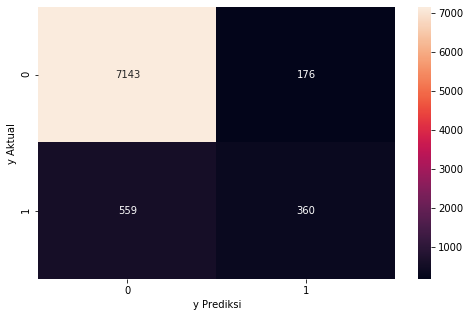

DecisionTreeClassifier()
 
               Score (%)
accuracy       88.783685
recall         47.007617
precision      49.712313
roc_auc_score  70.518428
f1_score       48.322148
 
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      7319
           1       0.50      0.47      0.48       919

    accuracy                           0.89      8238
   macro avg       0.72      0.71      0.71      8238
weighted avg       0.89      0.89      0.89      8238



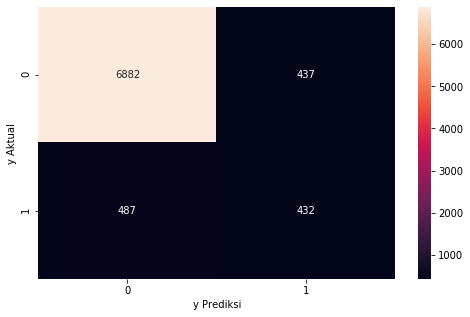

RandomForestClassifier()
 
               Score (%)
accuracy       90.701627
recall         50.489663
precision      59.870968
roc_auc_score  73.120224
f1_score       54.781582
 
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7319
           1       0.60      0.50      0.55       919

    accuracy                           0.91      8238
   macro avg       0.77      0.73      0.75      8238
weighted avg       0.90      0.91      0.90      8238



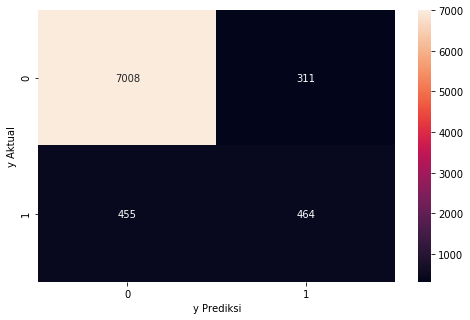

In [37]:
for name, model in models:
    model = model
     # model belajar dari data train
    model.fit(X_train, y_train)
    # membuat prediksi dan fungsinya untuk mengevaluasi model (dibandingkan dengan y aktual)
    y_pred = model.predict(X_test)
    
    hasil = pd.DataFrame(data = [accuracy_score(y_test, y_pred)*100, recall_score(y_test, y_pred)*100,
                        precision_score(y_test, y_pred)*100, roc_auc_score(y_test, y_pred)*100,
                        f1_score(y_test, y_pred)*100],
                        index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
                        columns = ['Score (%)'])
    print(model)
    print(" ")
    print(hasil)
    print(" ")
    # Confusion matrix report
    print(classification_report(y_test, y_pred))
    # untuk menampilkan visualisasi confusion matrix
    f, ax = plt.subplots(figsize=(8,5))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f', ax=ax)
    plt.xlabel('y Prediksi')
    plt.ylabel('y Aktual')
    plt.show()

#### Target 0 = No, 1 = Yes.
#### Kesalahan yang harus ditekan ialah yang Predicted 0 Actual 1 (False Negative).
#### Evaluation metric yang bisa menekan jenis kesalahan yang saya pilih ialah: Recall.
#### Alasan: Apabila False Negative semakin kecil, nilai Recall akan semakin besar.

# __Hyperparameter Tuning__

In [38]:
# parameter model logistic regression yang akan dituned + value di setiap parameter
penalty = ['l1', 'l2', 'elasticnet', 'none']
solver = ['newton-cg', 'lbfgs', 'liblinier', 'sag', 'saga']
max_iter = [1, 10, 100, 1000, 10000]

# simpan dalam variabel dengan nama 'param'
param = {'penalty': penalty, 'solver': solver, 'max_iter': max_iter}
param

{'penalty': ['l1', 'l2', 'elasticnet', 'none'],
 'solver': ['newton-cg', 'lbfgs', 'liblinier', 'sag', 'saga'],
 'max_iter': [1, 10, 100, 1000, 10000]}

In [39]:
model_LR = LogisticRegression()
model_LR_GS = GridSearchCV(model_LR, param, cv = 5)

In [132]:
model_LR_GS.fit(X_train, y_train)
model_LR_GS.best_params_

{'max_iter': 10000, 'penalty': 'l1', 'solver': 'saga'}

model_LR_GS.fit(X_train, y_train)
model_LR_GS.best_params_

In [40]:
model_LogReg_GS = LogisticRegression(solver='saga', penalty = 'l1', max_iter = 10000)
model_LogReg_GS.fit(X_train, y_train)

LogisticRegression(max_iter=10000, penalty='l1', solver='saga')

In [41]:
y_pred_GS = model_LogReg_GS.predict(X_test)

pd.DataFrame(data = [accuracy_score(y_test, y_pred_GS)*100, recall_score(y_test, y_pred_GS)*100,
                    precision_score(y_test, y_pred_GS)*100, roc_auc_score(y_test, y_pred_GS)*100,
                    f1_score(y_test, y_pred_GS)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])

,Score (%)
accuracy,91.150765
recall,38.846572
precision,68.129771
roc_auc_score,68.282420
f1_score,49.480249


              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7319
           1       0.68      0.39      0.49       919

    accuracy                           0.91      8238
   macro avg       0.80      0.68      0.72      8238
weighted avg       0.90      0.91      0.90      8238



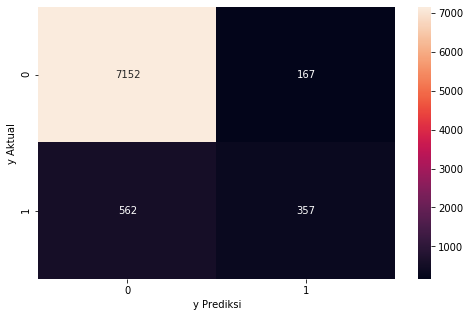

In [42]:
# Confusion matrix report
print(classification_report(y_test, y_pred_GS))
# untuk menampilkan visualisasi confusion matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_GS), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.show()

In [43]:
# parameter model Random Forest Classifier yang akan dituned + value di setiap parameter
min_samples_leaf = [1, 2, 4]
min_samples_split = [2, 5, 10]

# simpan dalam variabel dengan nama 'param'
param = {'min_samples_leaf': min_samples_leaf, 'min_samples_split': min_samples_split}
param

{'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10]}

In [44]:
model_RF =  RandomForestClassifier()
model_RF_GS = GridSearchCV(model_RF, param, cv = 5)

In [45]:
model_RF_GS.fit(X_train, y_train)
model_RF_GS.best_params_

{'min_samples_leaf': 4, 'min_samples_split': 5}

In [46]:
model_RF_GS = RandomForestClassifier(min_samples_leaf=4, min_samples_split=5)
model_RF_GS.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=4, min_samples_split=5)

In [48]:
y_pred_GS = model_RF_GS.predict(X_test)

pd.DataFrame(data = [accuracy_score(y_test, y_pred_GS)*100, recall_score(y_test, y_pred_GS)*100,
                    precision_score(y_test, y_pred_GS)*100, roc_auc_score(y_test, y_pred_GS)*100,
                    f1_score(y_test, y_pred_GS)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])

,Score (%)
accuracy,91.575625
recall,51.360174
precision,65.646732
roc_auc_score,73.992698
f1_score,57.631258


              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7319
           1       0.66      0.51      0.58       919

    accuracy                           0.92      8238
   macro avg       0.80      0.74      0.76      8238
weighted avg       0.91      0.92      0.91      8238



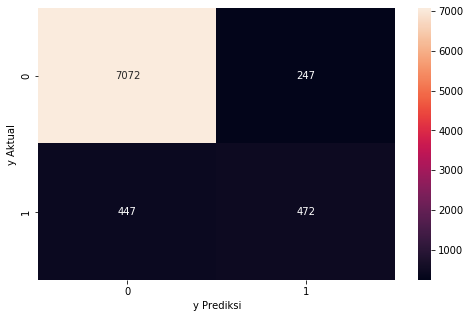

In [49]:
# Confusion matrix report
print(classification_report(y_test, y_pred_GS))
# untuk menampilkan visualisasi confusion matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_GS), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.show()

In [50]:
# parameter model decision tree yang akan dituned + value di setiap parameter
min_samples_split = [2, 3, 4]
min_samples_leaf = [1, 5, 10, 20, 50, 100]
max_depth = [4,6,8,12]

# simpan dalam variabel dengan nama 'param'
param = {'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf, 'max_depth': max_depth}
param

{'min_samples_split': [2, 3, 4],
 'min_samples_leaf': [1, 5, 10, 20, 50, 100],
 'max_depth': [4, 6, 8, 12]}

In [51]:
model_DT = DecisionTreeClassifier()
model_DT_GS = GridSearchCV(model_DT, param, cv = 5)

In [52]:
model_DT_GS.fit(X_train, y_train)
model_DT_GS.best_params_

{'max_depth': 4, 'min_samples_leaf': 50, 'min_samples_split': 2}

In [53]:
model_DT_GS = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 50, min_samples_split = 2)
model_DT_GS.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=50)

In [55]:
y_pred_GS = model_DT_GS.predict(X_test)

pd.DataFrame(data = [accuracy_score(y_test, y_pred_GS)*100, recall_score(y_test, y_pred_GS)*100,
                    precision_score(y_test, y_pred_GS)*100, roc_auc_score(y_test, y_pred_GS)*100,
                    f1_score(y_test, y_pred_GS)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])

,Score (%)
accuracy,91.478514
recall,55.277476
precision,63.579474
roc_auc_score,75.650761
f1_score,59.138533


              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7319
           1       0.64      0.55      0.59       919

    accuracy                           0.91      8238
   macro avg       0.79      0.76      0.77      8238
weighted avg       0.91      0.91      0.91      8238



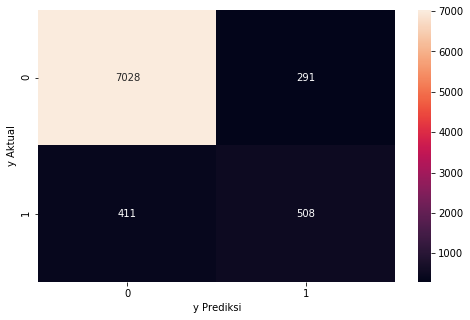

In [56]:
# Confusion matrix report
print(classification_report(y_test, y_pred_GS))
# untuk menampilkan visualisasi confusion matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_GS), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.show()

# __Over Sampling : SMOTE__

In [60]:
bank2['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [63]:
x = [round(i/len(bank2)*100, 2) for i in bank2['y'].value_counts()]
pd.DataFrame(data=x, index=['Not Subscribe', 'Subscribe'], columns=['Data (%)'])

,Data (%)
Not Subscribe,88.73
Subscribe,11.27


In [58]:
from imblearn.over_sampling import SMOTE

In [59]:
sm = SMOTE(random_state = 0)
x_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

In [66]:
# fitting model
model_LR_sm = LogisticRegression()
model_LR_sm.fit(x_train_sm, y_train_sm)

#prediksi
y_pred_sm = model_LR_sm.predict(X_test)

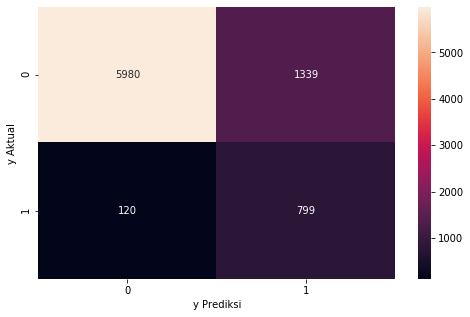

In [67]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_sm), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.show()

In [68]:
print(classification_report(y_test, y_pred_sm))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89      7319
           1       0.37      0.87      0.52       919

    accuracy                           0.82      8238
   macro avg       0.68      0.84      0.71      8238
weighted avg       0.91      0.82      0.85      8238



In [69]:
pd.DataFrame(data = [accuracy_score(y_test, y_pred_sm)*100, recall_score(y_test, y_pred_sm)*100,
                    precision_score(y_test, y_pred_sm)*100, roc_auc_score(y_test, y_pred_sm)*100,
                     f1_score(y_test, y_pred_sm)*100],
             index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
             columns = ['Score (%)']
            )

,Score (%)
accuracy,82.289391
recall,86.942329
precision,37.371375
roc_auc_score,84.323740
f1_score,52.273471


In [36]:
# menyimpan model algoritma ke dalam variabel 'models'
models = [
    ['Logistic Regression : ', LogisticRegression()],
    ['DecisionTree : ', DecisionTreeClassifier()],
    ['RandomForest : ', RandomForestClassifier()],
]

LogisticRegression()
 
               Score (%)
accuracy       82.289391
recall         86.942329
precision      37.371375
roc_auc_score  84.323740
f1_score       52.273471
 
              precision    recall  f1-score   support

           0       0.98      0.82      0.89      7319
           1       0.37      0.87      0.52       919

    accuracy                           0.82      8238
   macro avg       0.68      0.84      0.71      8238
weighted avg       0.91      0.82      0.85      8238



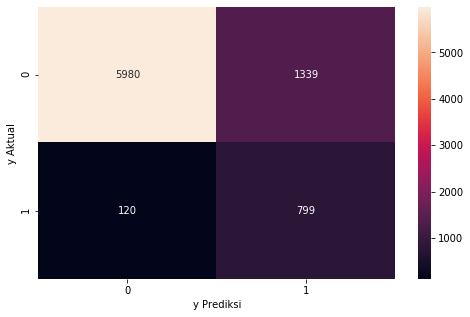

DecisionTreeClassifier()
 
               Score (%)
accuracy       88.686574
recall         49.945593
precision      49.301826
roc_auc_score  71.748312
f1_score       49.621622
 
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7319
           1       0.49      0.50      0.50       919

    accuracy                           0.89      8238
   macro avg       0.72      0.72      0.72      8238
weighted avg       0.89      0.89      0.89      8238



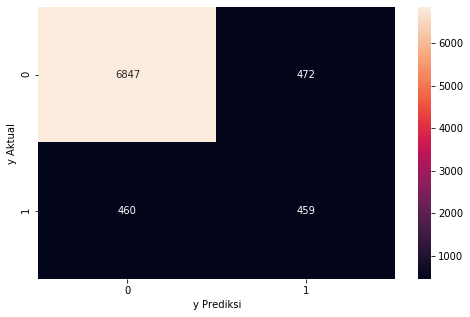

RandomForestClassifier()
 
               Score (%)
accuracy       90.786599
recall         59.847661
precision      58.510638
roc_auc_score  77.259532
f1_score       59.171598
 
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      7319
           1       0.59      0.60      0.59       919

    accuracy                           0.91      8238
   macro avg       0.77      0.77      0.77      8238
weighted avg       0.91      0.91      0.91      8238



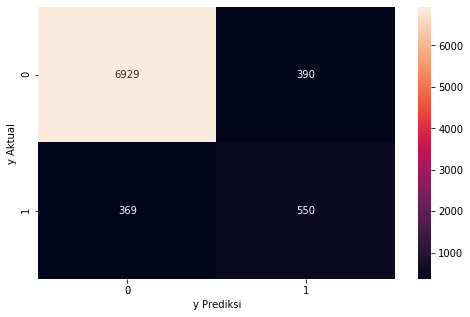

In [70]:
for name, model in models:
    model = model
     # model belajar dari data train
    model.fit(x_train_sm, y_train_sm)
    # membuat prediksi dan fungsinya untuk mengevaluasi model (dibandingkan dengan y aktual)
    y_pred = model.predict(X_test)
    
    hasil = pd.DataFrame(data = [accuracy_score(y_test, y_pred)*100, recall_score(y_test, y_pred)*100,
                        precision_score(y_test, y_pred)*100, roc_auc_score(y_test, y_pred)*100,
                        f1_score(y_test, y_pred)*100],
                        index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
                        columns = ['Score (%)'])
    print(model)
    print(" ")
    print(hasil)
    print(" ")
    # Confusion matrix report
    print(classification_report(y_test, y_pred))
    # untuk menampilkan visualisasi confusion matrix
    f, ax = plt.subplots(figsize=(8,5))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f', ax=ax)
    plt.xlabel('y Prediksi')
    plt.ylabel('y Aktual')
    plt.show()

# __Hyperparameter Tuning__

In [71]:
# parameter model logistic regression yang akan dituned + value di setiap parameter
penalty = ['l1', 'l2', 'elasticnet', 'none']
solver = ['newton-cg', 'lbfgs', 'liblinier', 'sag', 'saga']
max_iter = [1, 10, 100, 1000, 10000]

# simpan dalam variabel dengan nama 'param'
param = {'penalty': penalty, 'solver': solver, 'max_iter': max_iter}
param

{'penalty': ['l1', 'l2', 'elasticnet', 'none'],
 'solver': ['newton-cg', 'lbfgs', 'liblinier', 'sag', 'saga'],
 'max_iter': [1, 10, 100, 1000, 10000]}

In [72]:
model_LR = LogisticRegression()
model_LR_GS = GridSearchCV(model_LR, param, cv = 5)

In [76]:
model_LR_GS.fit(x_train_sm, y_train_sm)
model_LR_GS.best_params_

{'max_iter': 100, 'penalty': 'none', 'solver': 'lbfgs'}

model_LR_GS.fit(X_train, y_train)
model_LR_GS.best_params_

In [77]:
model_LogReg_GS = LogisticRegression(solver='lbfgs', penalty = 'none', max_iter = 100)
model_LogReg_GS.fit(x_train_sm, y_train_sm)

LogisticRegression(penalty='none')

In [78]:
y_pred_GS = model_LogReg_GS.predict(X_test)

pd.DataFrame(data = [accuracy_score(y_test, y_pred_GS)*100, recall_score(y_test, y_pred_GS)*100,
                    precision_score(y_test, y_pred_GS)*100, roc_auc_score(y_test, y_pred_GS)*100,
                    f1_score(y_test, y_pred_GS)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])

,Score (%)
accuracy,82.265113
recall,86.724701
precision,37.312734
roc_auc_score,84.214926
f1_score,52.176759


              precision    recall  f1-score   support

           0       0.98      0.82      0.89      7319
           1       0.37      0.87      0.52       919

    accuracy                           0.82      8238
   macro avg       0.68      0.84      0.71      8238
weighted avg       0.91      0.82      0.85      8238



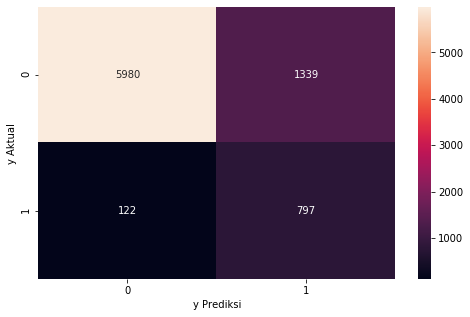

In [79]:
# Confusion matrix report
print(classification_report(y_test, y_pred_GS))
# untuk menampilkan visualisasi confusion matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_GS), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.show()

In [80]:
# parameter model Random Forest Classifier yang akan dituned + value di setiap parameter
min_samples_leaf = [1, 2, 4]
min_samples_split = [2, 5, 10]

# simpan dalam variabel dengan nama 'param'
param = {'min_samples_leaf': min_samples_leaf, 'min_samples_split': min_samples_split}
param

{'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10]}

In [81]:
model_RF =  RandomForestClassifier()
model_RF_GS = GridSearchCV(model_RF, param, cv = 5)

In [82]:
model_RF_GS.fit(x_train_sm, y_train_sm)
model_RF_GS.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 2}

In [84]:
model_RF_GS = RandomForestClassifier(min_samples_leaf=1, min_samples_split=2)
model_RF_GS.fit(x_train_sm, y_train_sm)

RandomForestClassifier()

In [85]:
y_pred_GS = model_RF_GS.predict(X_test)

pd.DataFrame(data = [accuracy_score(y_test, y_pred_GS)*100, recall_score(y_test, y_pred_GS)*100,
                    precision_score(y_test, y_pred_GS)*100, roc_auc_score(y_test, y_pred_GS)*100,
                    f1_score(y_test, y_pred_GS)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])

,Score (%)
accuracy,90.580238
recall,60.391730
precision,57.394002
roc_auc_score,77.381273
f1_score,58.854719


              precision    recall  f1-score   support

           0       0.95      0.94      0.95      7319
           1       0.57      0.60      0.59       919

    accuracy                           0.91      8238
   macro avg       0.76      0.77      0.77      8238
weighted avg       0.91      0.91      0.91      8238



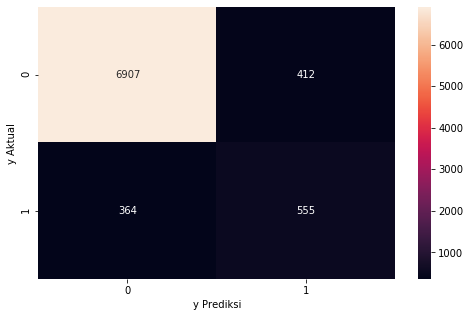

In [86]:
# Confusion matrix report
print(classification_report(y_test, y_pred_GS))
# untuk menampilkan visualisasi confusion matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_GS), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.show()

In [87]:
# parameter model decision tree yang akan dituned + value di setiap parameter
min_samples_split = [2, 3, 4]
min_samples_leaf = [1, 5, 10, 20, 50, 100]
max_depth = [4,6,8,12]

# simpan dalam variabel dengan nama 'param'
param = {'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf, 'max_depth': max_depth}
param

{'min_samples_split': [2, 3, 4],
 'min_samples_leaf': [1, 5, 10, 20, 50, 100],
 'max_depth': [4, 6, 8, 12]}

In [88]:
model_DT = DecisionTreeClassifier()
model_DT_GS = GridSearchCV(model_DT, param, cv = 5)

In [90]:
model_DT_GS.fit(x_train_sm, y_train_sm)
model_DT_GS.best_params_

{'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 3}

In [91]:
model_DT_GS = DecisionTreeClassifier(max_depth = 12, min_samples_leaf = 1, min_samples_split = 3)
model_DT_GS.fit(x_train_sm, y_train_sm)

DecisionTreeClassifier(max_depth=12, min_samples_split=3)

In [92]:
y_pred_GS = model_DT_GS.predict(X_test)

pd.DataFrame(data = [accuracy_score(y_test, y_pred_GS)*100, recall_score(y_test, y_pred_GS)*100,
                    precision_score(y_test, y_pred_GS)*100, roc_auc_score(y_test, y_pred_GS)*100,
                    f1_score(y_test, y_pred_GS)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])

,Score (%)
accuracy,90.240350
recall,69.314472
precision,54.961173
roc_auc_score,81.091175
f1_score,61.308951


              precision    recall  f1-score   support

           0       0.96      0.93      0.94      7319
           1       0.55      0.69      0.61       919

    accuracy                           0.90      8238
   macro avg       0.75      0.81      0.78      8238
weighted avg       0.91      0.90      0.91      8238



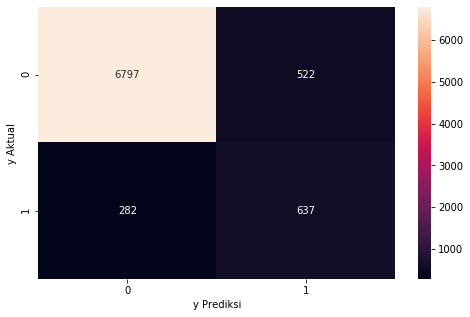

In [93]:
# Confusion matrix report
print(classification_report(y_test, y_pred_GS))
# untuk menampilkan visualisasi confusion matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_GS), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.show()

### __Splitting Dataset__

In [94]:
x2 = bank2.drop(['y'], axis=1)
y2 = bank2['y']

In [95]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size = 0.1, random_state=0)

# __Over Sampling : SMOTE__

In [96]:
from imblearn.over_sampling import SMOTE

In [97]:
sm = SMOTE(random_state = 0)
x_train_sm2, y_train_sm2 = sm.fit_sample(X_train2, y_train2)

In [98]:
# menyimpan model algoritma ke dalam variabel 'models'
models = [
    ['Logistic Regression : ', LogisticRegression()],
    ['DecisionTree : ', DecisionTreeClassifier()],
    ['RandomForest : ', RandomForestClassifier()],
]

LogisticRegression()
 
               Score (%)
accuracy       82.544307
recall         86.724701
precision      37.718883
roc_auc_score  84.372051
f1_score       52.572559
 
              precision    recall  f1-score   support

           0       0.98      0.82      0.89      7319
           1       0.38      0.87      0.53       919

    accuracy                           0.83      8238
   macro avg       0.68      0.84      0.71      8238
weighted avg       0.91      0.83      0.85      8238



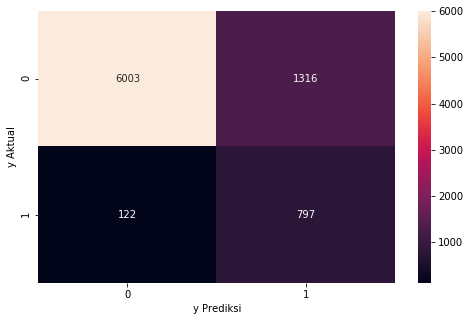

DecisionTreeClassifier()
 
               Score (%)
accuracy       93.529983
recall         71.381937
precision      70.842333
roc_auc_score  83.846454
f1_score       71.111111
 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      7319
           1       0.71      0.71      0.71       919

    accuracy                           0.94      8238
   macro avg       0.84      0.84      0.84      8238
weighted avg       0.94      0.94      0.94      8238



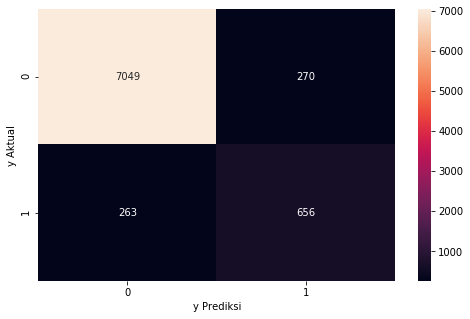

RandomForestClassifier()
 
               Score (%)
accuracy       94.622481
recall         78.237214
precision      74.740125
roc_auc_score  87.458544
f1_score       76.448698
 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      7319
           1       0.75      0.78      0.76       919

    accuracy                           0.95      8238
   macro avg       0.86      0.87      0.87      8238
weighted avg       0.95      0.95      0.95      8238



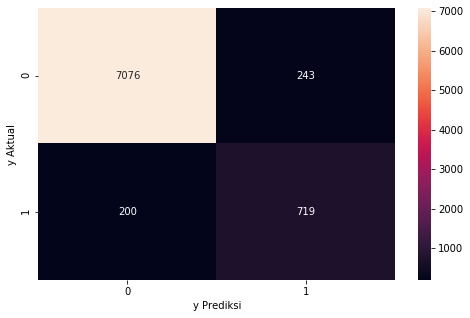

In [99]:
for name, model in models:
    model = model
     # model belajar dari data train
    model.fit(x_train_sm2, y_train_sm2)
    # membuat prediksi dan fungsinya untuk mengevaluasi model (dibandingkan dengan y aktual)
    y_pred = model.predict(X_test)
    
    hasil = pd.DataFrame(data = [accuracy_score(y_test, y_pred)*100, recall_score(y_test, y_pred)*100,
                        precision_score(y_test, y_pred)*100, roc_auc_score(y_test, y_pred)*100,
                        f1_score(y_test, y_pred)*100],
                        index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
                        columns = ['Score (%)'])
    print(model)
    print(" ")
    print(hasil)
    print(" ")
    # Confusion matrix report
    print(classification_report(y_test, y_pred))
    # untuk menampilkan visualisasi confusion matrix
    f, ax = plt.subplots(figsize=(8,5))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f', ax=ax)
    plt.xlabel('y Prediksi')
    plt.ylabel('y Aktual')
    plt.show()

# __Hyperparameter Tuning__

In [100]:
# parameter model logistic regression yang akan dituned + value di setiap parameter
penalty = ['l1', 'l2', 'elasticnet', 'none']
solver = ['newton-cg', 'lbfgs', 'liblinier', 'sag', 'saga']
max_iter = [1, 10, 100, 1000, 10000]

# simpan dalam variabel dengan nama 'param'
param = {'penalty': penalty, 'solver': solver, 'max_iter': max_iter}
param

{'penalty': ['l1', 'l2', 'elasticnet', 'none'],
 'solver': ['newton-cg', 'lbfgs', 'liblinier', 'sag', 'saga'],
 'max_iter': [1, 10, 100, 1000, 10000]}

In [101]:
model_LR = LogisticRegression()
model_LR_GS = GridSearchCV(model_LR, param, cv = 5)

In [102]:
model_LR_GS.fit(x_train_sm2, y_train_sm2)
model_LR_GS.best_params_

{'max_iter': 100, 'penalty': 'none', 'solver': 'lbfgs'}

model_LR_GS.fit(X_train, y_train)
model_LR_GS.best_params_

In [110]:
model_LogReg_GS = LogisticRegression(solver='lbfgs', penalty = 'none', max_iter = 100)
model_LogReg_GS.fit(x_train_sm2, y_train_sm2)

LogisticRegression(penalty='none')

In [111]:
y_pred_GS = model_LogReg_GS.predict(X_test)

pd.DataFrame(data = [accuracy_score(y_test, y_pred_GS)*100, recall_score(y_test, y_pred_GS)*100,
                    precision_score(y_test, y_pred_GS)*100, roc_auc_score(y_test, y_pred_GS)*100,
                    f1_score(y_test, y_pred_GS)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])

,Score (%)
accuracy,82.495751
recall,86.507073
precision,37.624231
roc_auc_score,84.249574
f1_score,52.440633


              precision    recall  f1-score   support

           0       0.98      0.82      0.89      7319
           1       0.38      0.87      0.52       919

    accuracy                           0.82      8238
   macro avg       0.68      0.84      0.71      8238
weighted avg       0.91      0.82      0.85      8238



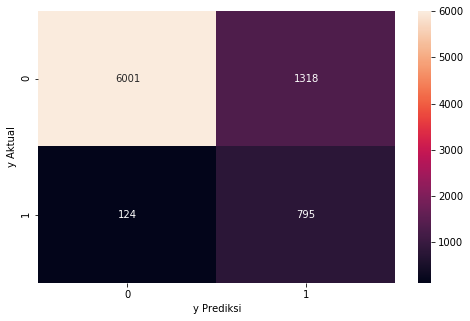

In [112]:
# Confusion matrix report
print(classification_report(y_test, y_pred_GS))
# untuk menampilkan visualisasi confusion matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_GS), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.show()

In [113]:
# parameter model Random Forest Classifier yang akan dituned + value di setiap parameter
min_samples_leaf = [1, 2, 4]
min_samples_split = [2, 5, 10]

# simpan dalam variabel dengan nama 'param'
param = {'min_samples_leaf': min_samples_leaf, 'min_samples_split': min_samples_split}
param

{'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10]}

In [114]:
model_RF =  RandomForestClassifier()
model_RF_GS = GridSearchCV(model_RF, param, cv = 5)

In [115]:
model_RF_GS.fit(x_train_sm2, y_train_sm2)
model_RF_GS.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 5}

In [116]:
model_RF_GS = RandomForestClassifier(min_samples_leaf=1, min_samples_split=2)
model_RF_GS.fit(x_train_sm2, y_train_sm2)

RandomForestClassifier()

In [117]:
y_pred_GS = model_RF_GS.predict(X_test)

pd.DataFrame(data = [accuracy_score(y_test, y_pred_GS)*100, recall_score(y_test, y_pred_GS)*100,
                    precision_score(y_test, y_pred_GS)*100, roc_auc_score(y_test, y_pred_GS)*100,
                    f1_score(y_test, y_pred_GS)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])

,Score (%)
accuracy,94.658898
recall,77.910773
precision,75.131165
roc_auc_score,87.336313
f1_score,76.495726


              precision    recall  f1-score   support

           0       0.97      0.97      0.97      7319
           1       0.75      0.78      0.76       919

    accuracy                           0.95      8238
   macro avg       0.86      0.87      0.87      8238
weighted avg       0.95      0.95      0.95      8238



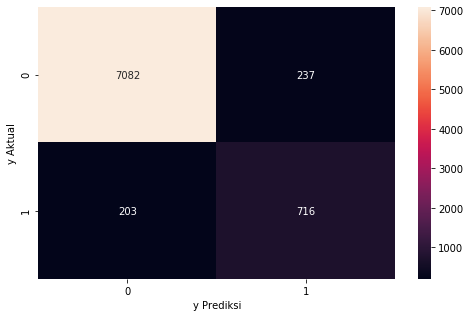

In [118]:
# Confusion matrix report
print(classification_report(y_test, y_pred_GS))
# untuk menampilkan visualisasi confusion matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_GS), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.show()

In [119]:
# parameter model decision tree yang akan dituned + value di setiap parameter
min_samples_split = [2, 3, 4]
min_samples_leaf = [1, 5, 10, 20, 50, 100]
max_depth = [4,6,8,12]

# simpan dalam variabel dengan nama 'param'
param = {'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf, 'max_depth': max_depth}
param

{'min_samples_split': [2, 3, 4],
 'min_samples_leaf': [1, 5, 10, 20, 50, 100],
 'max_depth': [4, 6, 8, 12]}

In [120]:
model_DT = DecisionTreeClassifier()
model_DT_GS = GridSearchCV(model_DT, param, cv = 5)

In [121]:
model_DT_GS.fit(x_train_sm2, y_train_sm2)
model_DT_GS.best_params_

{'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 4}

In [122]:
model_DT_GS = DecisionTreeClassifier(max_depth = 12, min_samples_leaf = 1, min_samples_split = 3)
model_DT_GS.fit(x_train_sm2, y_train_sm2)

DecisionTreeClassifier(max_depth=12, min_samples_split=3)

In [123]:
y_pred_GS = model_DT_GS.predict(X_test)

pd.DataFrame(data = [accuracy_score(y_test, y_pred_GS)*100, recall_score(y_test, y_pred_GS)*100,
                    precision_score(y_test, y_pred_GS)*100, roc_auc_score(y_test, y_pred_GS)*100,
                    f1_score(y_test, y_pred_GS)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])

,Score (%)
accuracy,90.701627
recall,76.060936
precision,56.144578
roc_auc_score,84.300450
f1_score,64.602588


              precision    recall  f1-score   support

           0       0.97      0.93      0.95      7319
           1       0.56      0.76      0.65       919

    accuracy                           0.91      8238
   macro avg       0.76      0.84      0.80      8238
weighted avg       0.92      0.91      0.91      8238



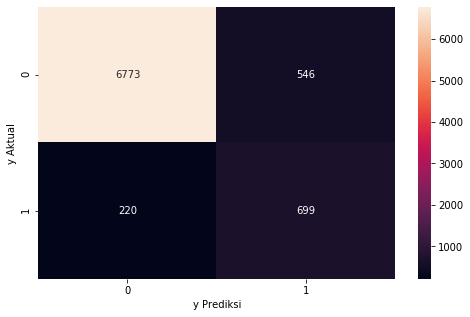

In [124]:
# Confusion matrix report
print(classification_report(y_test, y_pred_GS))
# untuk menampilkan visualisasi confusion matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_GS), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.show()